<a href="https://colab.research.google.com/github/madhavamk/computational-data-science/blob/master/MiniProjects/M8_NB_MiniProject_1_Market_Basket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science

##  A program by IISc and TalentSprint

### Mini Project 1: Market Basket analysis

## Learning Objectives

At the end of the experiment, you will be able to:

* extract summary level insight from a given dataset

* Integrate the data and identify the underlying pattern or structure

* understand the fundamentals of market basket analysis

* construct "rules" that provide concrete recommendations for businesses

## Dataset

The dataset chosen for this mini project is **Instacart Dataset**. The dataset is anonymized and contains a sample of over 3 million grocery orders from more than 200,000 Instacart users. For each user, there are orders between 4 and 100, with the sequence of products purchased in each order. The dataset also includes the products in each order, the time of day and day of week of each order, the name and aisle/department of each product, which are stored across various files.

## Problem Statement


Extract association rules and find groups of frequently purchased items from a large-scale grocery orders dataset.

## Grading = 10 Points

#### Import required packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

## **Stage 1**: Data Wrangling

We have five different files:

    - orders.csv
    - order_products__train.csv
    - products.csv
    - aisles.csv
    - departments.csv

These files contain the neccesary data to solve the problem. Load all the files correctly, after observing the header level details, data records etc

**Hint:** Use `read_csv` from pandas

In [2]:
#@title Download the data
!wget -qq https://cdn.iisc.talentsprint.com/CDS/Datasets/Instacart.zip
!unzip -qq Instacart.zip

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Load the data

Load all the given datasets

In [7]:
# YOUR CODE HERE
df_orders = pd.read_csv('/content/Instacart/orders.csv')
df_order_products = pd.read_csv('/content/Instacart/order_products__train.csv')
df_products = pd.read_csv('/content/Instacart/products.csv')
df_aisles = pd.read_csv('/content/Instacart/aisles.csv')
df_departments = pd.read_csv('/content/Instacart/departments.csv')

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
df_aisles.head()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [12]:
df_departments.head()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [11]:
df_products.head()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [10]:
df_orders_products.head()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,product_id,product_name,aisle_id,department_id,order_id,add_to_cart_order,reordered
0,1,Chocolate Sandwich Cookies,61,19,6695,7,1
1,1,Chocolate Sandwich Cookies,61,19,48361,9,0
2,1,Chocolate Sandwich Cookies,61,19,63770,4,0
3,1,Chocolate Sandwich Cookies,61,19,75339,9,0
4,1,Chocolate Sandwich Cookies,61,19,240996,3,1


In [9]:
df_orders.head()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


### Data Integration (1 point)

As the required data is present in different files, we need to integrate all the five to make single dataframe/dataset. For that purpose, use the unique identifier provided in all the dataframes so that it can be used to map the data in different files correctly.

**Example:** `product_id` is available in both `products` dataframe and `order_products__train` dataframe, we can merge these two into a single dataframe based on `product_id`

**Hint:** [pd.merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html)

In [14]:
df_orders_products_combined.head()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,product_id,product_name,aisle_id,department_id,order_id,add_to_cart_order,reordered
0,1,Chocolate Sandwich Cookies,61,19,6695,7,1
1,1,Chocolate Sandwich Cookies,61,19,48361,9,0
2,1,Chocolate Sandwich Cookies,61,19,63770,4,0
3,1,Chocolate Sandwich Cookies,61,19,75339,9,0
4,1,Chocolate Sandwich Cookies,61,19,240996,3,1


In [15]:
# YOUR CODE HERE
df_orders_products_combined = pd.merge(df_products, df_order_products, how='inner', on='product_id')
df_product_orders_combined = pd.merge(df_orders_products_combined, df_orders, how='inner', on='order_id')
df_prd_ord_ais_combined = pd.merge(df_product_orders_combined, df_aisles, how='inner', on='aisle_id')
df_combined = pd.merge(df_prd_ord_ais_combined, df_departments, how='inner', on='department_id')

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
df_combined.head()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,product_id,product_name,aisle_id,department_id,order_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,6695,7,1,1540,train,29,1,1,8.0,cookies cakes,snacks
1,1,Chocolate Sandwich Cookies,61,19,48361,9,0,194636,train,5,2,14,11.0,cookies cakes,snacks
2,1,Chocolate Sandwich Cookies,61,19,63770,4,0,751,train,7,2,6,30.0,cookies cakes,snacks
3,1,Chocolate Sandwich Cookies,61,19,75339,9,0,142585,train,6,1,13,30.0,cookies cakes,snacks
4,1,Chocolate Sandwich Cookies,61,19,240996,3,1,57938,train,49,4,11,21.0,cookies cakes,snacks


### Understanding relationships and new insights from the data (3 points)

1.  How many times was each product ordered?

    **Hint:** group orders by product
    

2.  Find the number of orders per department and visualize using an appropriate plot


3.  On which day of the week do customers tend to buy more groceries? Which are the peak hours
of shopping?

  * Find the frequency of orders on week days using an appropriate plot
  * Find the frequency of orders during hours of the day using an appropriate plot?
  

4. Find the ratio of Re-ordered and Not Re-ordered products and visualize it

5. Plot the heatmap of Re-order ratio of the Day of week vs Hour of day

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='order_hour_of_day', ylabel='order_dow'>

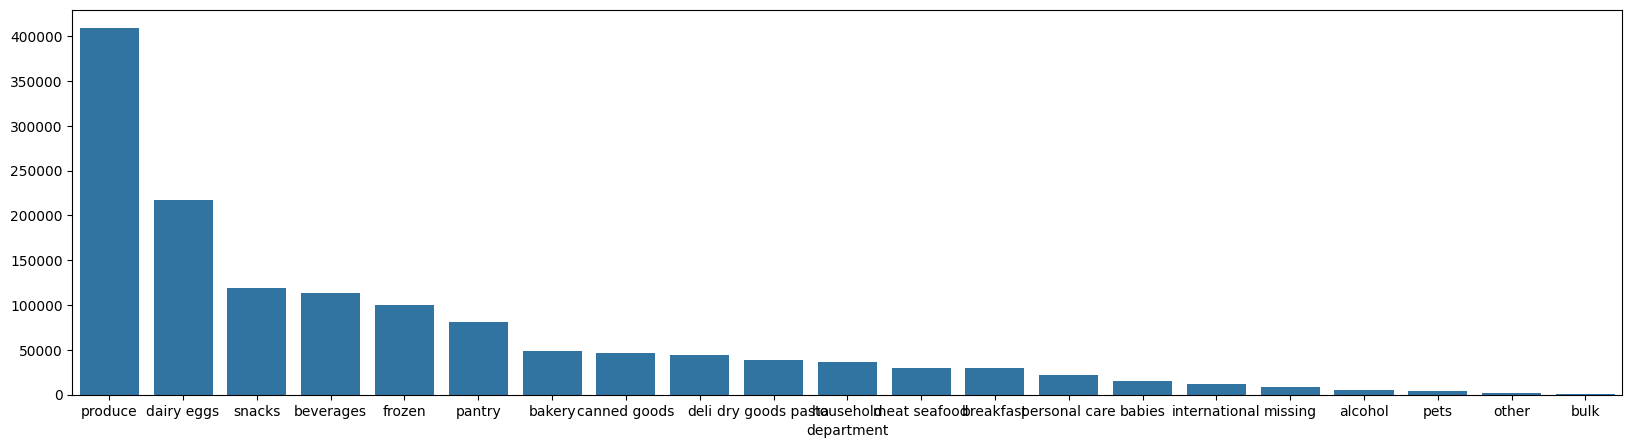

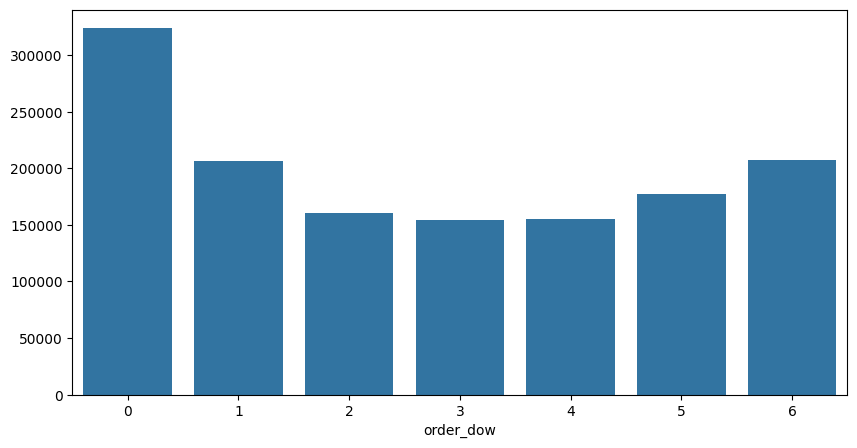

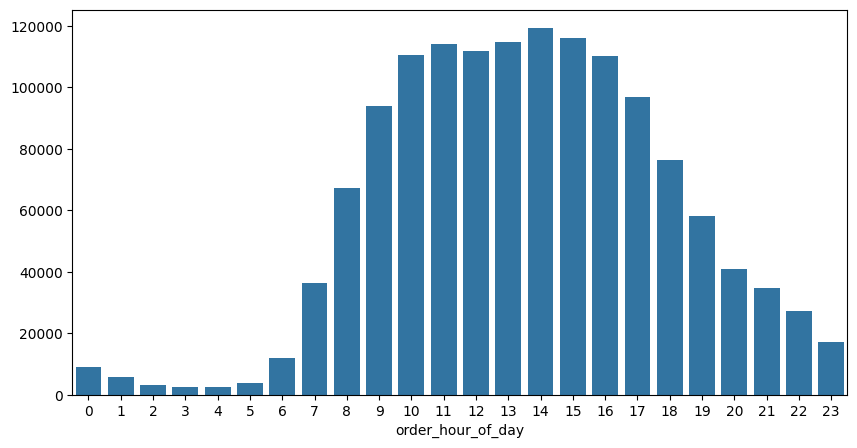

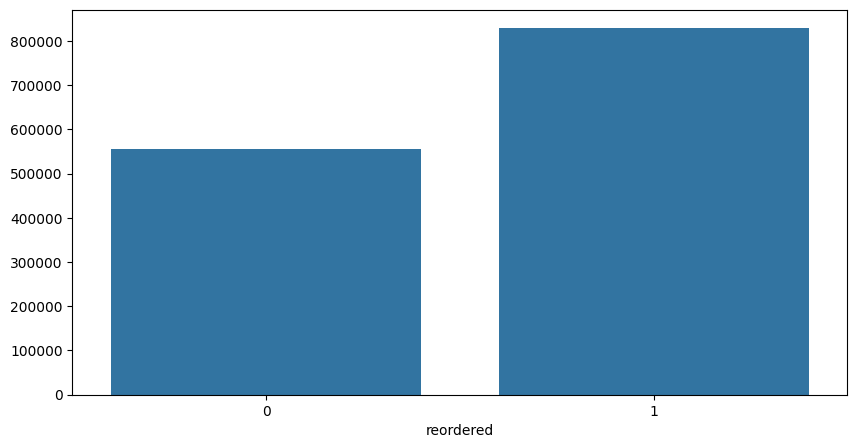

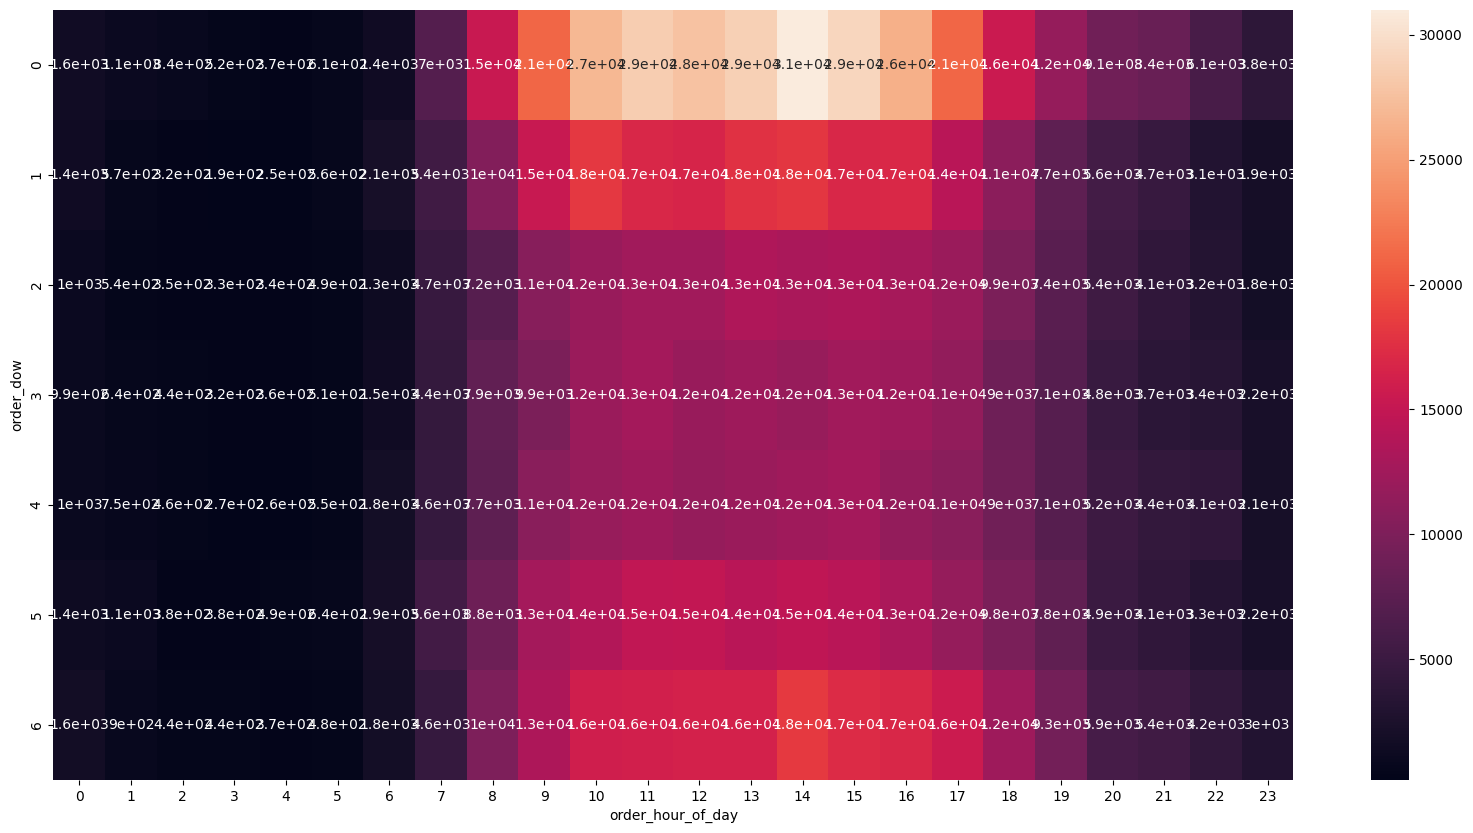

In [29]:
# YOUR CODE HERE
# 1. How many times was each product ordered?
df_combined.groupby('product_name')['order_id'].count().sort_values(ascending=False)

# 2. Find the number of orders per department and visualize using an appropriate plot
df_combined.groupby('department')['order_id'].count().sort_values(ascending=False)
# plot the above result
plt.figure(figsize=(20, 5))
sns.barplot(x=df_combined.groupby('department')['order_id'].count().sort_values(ascending=False).index,\
            y=df_combined.groupby('department')['order_id'].count().sort_values(ascending=False).values)

# 3. On which day of the week do customers tend to buy more groceries? Which are the peak hours of shopping?
# 3.1 find freq of orders on week days
df_combined.groupby('order_dow')['order_id'].count().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=df_combined.groupby('order_dow')['order_id'].count().sort_values(ascending=False).index,\
            y=df_combined.groupby('order_dow')['order_id'].count().sort_values(ascending=False).values)

# 3.2 find freq of orders during hours of the day
df_combined.groupby('order_hour_of_day')['order_id'].count().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=df_combined.groupby('order_hour_of_day')['order_id'].count().sort_values(ascending=False).index,\
            y=df_combined.groupby('order_hour_of_day')['order_id'].count().sort_values(ascending=False).values)

# 4. Find the ratio of reordered and not re-ordered products
df_combined.groupby('reordered')['product_id'].count()
# plot graph naming the ordered and reordered
plt.figure(figsize=(10, 5))
sns.barplot(x=df_combined.groupby('reordered')['product_id'].count().sort_values(ascending=False).index,\
            y=df_combined.groupby('reordered')['product_id'].count().sort_values(ascending=False).values)

# 5. Plot the heatmap of Re-order ratio of the Day of week vs Hour of day
plt.figure(figsize=(20, 10))
sns.heatmap(df_combined.groupby(['order_dow', 'order_hour_of_day'])['reordered'].count().unstack(), annot=True)

## **Stage 2:** Create a basket (4 points)

As the dataset contains huge amount of data, let us take a subset of the data to extract the association rules from it.

**Assumption:** Segment the data by considering the 100 most frequent ordered items. Please note it is just an assumption. You can consider 'n' frequent order items as per your choice.

**Hint:**

- Drop the unwanted columns

- Find the frequencies of orders based on the products and  consider the 100 most frequent order items.

    **Hint:** Count the frequencies of orders for each product_id using `groupby()` and `count()` respectively

- Extract the records of 100 most frequent items (which are extracted in previous step) from combined dataframe.

- Create a Pivot table with `order_id` as index and `product_name` as columns and `reorder` as values.

    - set the `order_id` as index using set_index()
    - fill all the nan values with 0

- After performing the above step, there are a lot of zeros in the data, make sure that any positive values are converted to a 1 and anything less than 0 is set to 0.


In [41]:
# YOUR CODE HERE
# Drop the unwanted columns
# df_combined.drop(['eval_set', 'add_to_cart_order', 'order_number', 'order_dow', \
#                   'order_hour_of_day', 'days_since_prior_order'],\
#                   axis=1, inplace=True)

# Find freq of orders for each product_id using groupby and count respectively
freq_orders = df_combined.groupby('product_name')['order_id'].count().sort_values(ascending=False)

# Extract the records of 100 most freq items from combined df
df_100_freq_items = df_combined[df_combined['product_name'].isin(freq_orders.head(100).index)]

# Create pivot table with order_id as index and product_name as columns and reorder as values
df_pivot = df_100_freq_items.pivot_table(index='order_id', columns='product_name', values='reordered', aggfunc='sum')
df_pivot.head()

# set the order_id as index using set_index
# erroring below, need to check
# df_pivot.set_index('order_id', inplace=True)

# fill all the nan values with 0
df_pivot.fillna(0, inplace=True)

# convert any positive values to a 1 and anything less than 0 to 0
df_pivot[df_pivot > 0] = 1
df_pivot[df_pivot < 0] = 0


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
df_pivot.head()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


product_name,100% Whole Wheat Bread,2% Reduced Fat Milk,Apple Honeycrisp Organic,Asparagus,Bag of Organic Bananas,Banana,Blueberries,Boneless Skinless Chicken Breasts,Broccoli Crown,Bunched Cilantro,...,Sparkling Lemon Water,Sparkling Natural Mineral Water,Sparkling Water Grapefruit,Spring Water,Strawberries,Uncured Genoa Salami,Unsalted Butter,Unsweetened Almondmilk,Unsweetened Original Almond Breeze Almond Milk,Yellow Onions
order_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## **Stage 3:** Apply Apriori algorithm (2 points)

- As the dataset contains huge amount of data, let us take a subset of the data to extract the association rules from it.

  **Assumption:** Segment the basket by considering 100000 records. Please note its just an assumption, you can consider 'n'  records as per your choice.

  **Hint:** [apriori](http://rasbt.github.io/mlxtend/api_subpackages/mlxtend.frequent_patterns/)

- Find the association rules and make a dataframe

In [43]:
# YOUR CODE HERE
# Use apriori
apriori(df_pivot.head(100000), min_support=0.01, use_colnames=True)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.018602,(100% Whole Wheat Bread)
1,0.013251,(2% Reduced Fat Milk)
2,0.017243,(Apple Honeycrisp Organic)
3,0.026087,(Asparagus)
4,0.141870,(Bag of Organic Bananas)
...,...,...
103,0.011276,"(Organic Avocado, Organic Baby Spinach)"
104,0.010193,"(Organic Baby Spinach, Organic Hass Avocado)"
105,0.012720,"(Organic Baby Spinach, Organic Strawberries)"
106,0.012592,"(Organic Hass Avocado, Organic Strawberries)"
